In [202]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Convolution2D, MaxPooling2D
import scipy.ndimage
import seaborn as sns
import matplotlib.pyplot as plt
import glob
import os
%matplotlib inline

In [98]:
DATADIR = '/tmp/ml_data'

In [95]:
img = scipy.ndimage.imread('/tmp/ml_data/train/circ/000.jpg')
img.shape

(150, 150)

In [214]:
def read_data(root_dir, classes, ext='.jpg'):
    file_glob = '*' + ext
    n_images = len(glob.glob(os.path.join(root_dir, '*', file_glob)))
    class_counts = [len(glob.glob(os.path.join(root_dir, c, file_glob))) for c in classes]
    example_img = glob.glob(os.path.join(root_dir, classes[0], file_glob))[0]
    img_dims = scipy.ndimage.imread(example_img).shape
    X = np.ndarray((n_images, img_dims[0], img_dims[1], 1))
    Y = np.ndarray(n_images)
    counter = 0
    for ic, c in enumerate(classes):
        n_class = class_counts[ic]
        path_patt = os.path.join(root_dir, c, '*' + ext)
        for ip, p in enumerate(glob.glob(path_patt)):
            X[counter, :, :, 0] = scipy.ndimage.imread(p)
            Y[counter] = ic
            counter += 1
    return X, Y

In [153]:
model = Sequential()
model.add(Convolution2D(32, 3, 3, input_shape=(150, 150, 1)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Convolution2D(32, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Convolution2D(64, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [155]:
X_train, Y_train = read_data('/tmp/ml_data/train', ('circ', 'tri'))
model.fit(X_train, Y_train, nb_epoch=10, batch_size=64)

Epoch 1/10
2000/2000 [==============================] - 401s - loss: 0.7488 - acc: 0.6320   
Epoch 2/10
2000/2000 [==============================] - 403s - loss: 0.5080 - acc: 0.7570   
Epoch 3/10
2000/2000 [==============================] - 399s - loss: 0.3615 - acc: 0.8315   
Epoch 4/10
2000/2000 [==============================] - 399s - loss: 0.2971 - acc: 0.8735   
Epoch 5/10
2000/2000 [==============================] - 392s - loss: 0.2631 - acc: 0.8890   
Epoch 6/10
2000/2000 [==============================] - 387s - loss: 0.1959 - acc: 0.9150   
Epoch 7/10
2000/2000 [==============================] - 387s - loss: 0.1806 - acc: 0.9285   
Epoch 8/10
2000/2000 [==============================] - 385s - loss: 0.1492 - acc: 0.9405   
Epoch 9/10
2000/2000 [==============================] - 386s - loss: 0.1466 - acc: 0.9440   
Epoch 10/10
2000/2000 [==============================] - 385s - loss: 0.1224 - acc: 0.9480   


In [184]:
X_test, y_test = read_data('/tmp/ml_data/test', ('circ', 'tri'))

In [185]:
score = model.evaluate(X_test, y_test, batch_size=16)
score

200/200 [==============================] - 10s    


[0.14027621857821942, 0.94499999999999995]

In [188]:
proba = model.predict_proba(X_test)

200/200 [==============================] - 11s    


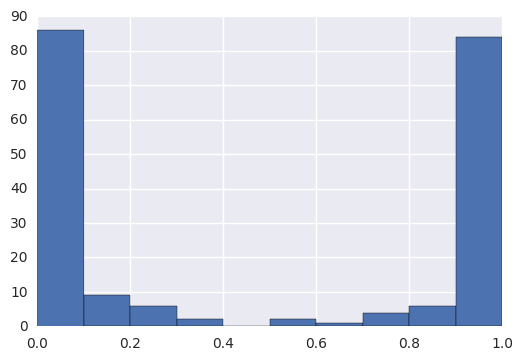

In [234]:
a = plt.hist(proba)

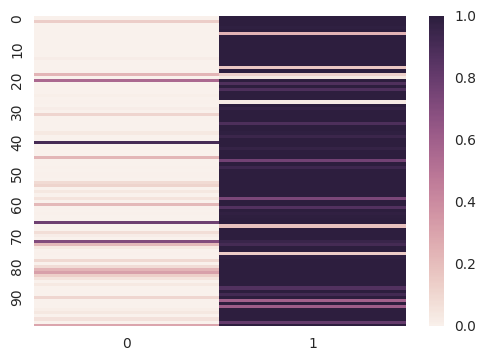

In [235]:
sns.heatmap(proba.reshape((100, 2), order='F'), yticklabels=10)

40

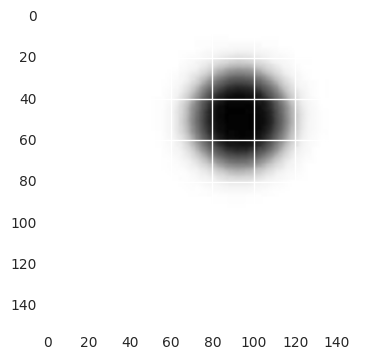

In [219]:
i_worst = np.argmax(proba[0:100])
plt.imshow(X_test[i_worst, :, :, 0])
i_worst

27

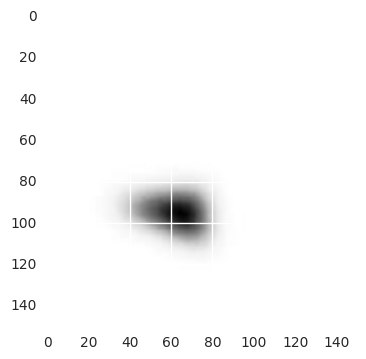

In [220]:
i_worst = np.argmin(proba[100:])
plt.imshow(X_test[100 + i_worst, :, :, 0])
i_worst